<img src="https://www.ikiam.edu.ec/img/logo-ikiam-grey.png" width=300 height=240 />

# *Universidad Regional Amazonica Ikiam*
Bioinformatica 

Salazar Mildreth 

# T5_Map of Science
Basado en las sesiones de Visualización de datos y Expresiones resulares. 
Realice una adaptación de la solución del MAP OF SCIENCE. Se requiere dos adaptaciones para resolver esta actividad:

* Buscar bibliografía de un tema de interés propio en la Página Web de PubMed.
* Realizar el minado de autores por país. 
* Para asignar las ubicación geográfica de los centroides de cada país (latitud y longitud), utilice la tabla  Ubicación Geográfica de Países - Google Developer. 
* En su resolución señale/resalte a los siguientes países: USA, UK, Brazil, China, Australia, Norway.  

import re
import csv
import itertools

In [240]:
with open('pubmed-inhibitors-set.txt',"r", encoding='utf-8-sig') as f: 
    my_text = f.read()
len(my_text)

29575237

In [241]:
my_text = re.sub(r'\n\s{6}', ' ', my_text)

In [242]:
print(my_text[:2000])

PMID- 32044947
OWN - NLM
STAT- MEDLINE
DCOM- 20200304
LR  - 20200304
IS  - 1538-3598 (Electronic)
IS  - 0098-7484 (Linking)
VI  - 323
IP  - 6
DP  - 2020 Feb 11
TI  - Diagnosis and Treatment of Parkinson Disease: A Review.
PG  - 548-560
LID - 10.1001/jama.2019.22360 [doi]
AB  - IMPORTANCE: Parkinson disease is the most common form of parkinsonism, a group of  neurological disorders with Parkinson disease-like movement problems such as  rigidity, slowness, and tremor. More than 6 million individuals worldwide have  Parkinson disease. OBSERVATIONS: Diagnosis of Parkinson disease is based on history  and examination. History can include prodromal features (eg, rapid eye movement  sleep behavior disorder, hyposmia, constipation), characteristic movement difficulty  (eg, tremor, stiffness, slowness), and psychological or cognitive problems (eg,  cognitive decline, depression, anxiety). Examination typically demonstrates  bradykinesia with tremor, rigidity, or both. Dopamine transporter singl

In [243]:
zipcodes = re.findall(r"\,\s[A-Z]+[A-z]{2,11}\.", my_text)

In [244]:
len(zipcodes)

19216

In [246]:
unique_zipcodes = list(set(zipcodes))

In [288]:
unique_zipcodes.sort()
a = unique_zipcodes
print(a)
print()
b = unique_zipcodes
print('Los 10 primeros caracteres de la lista de países son: ', b[:10]) 
print()
print('Los 10 primeros caracteres de la lista de países son: ', unique_zipcodes[:10])

['Albania', 'Algeria', 'Australia', 'Austria', 'Bangladesh', 'Belgium', 'Bolivia', 'Botswana', 'Brazil', 'Bulgaria', 'Burundi', 'Canada', 'Chad', 'Chile', 'China', 'Colombia', 'Croatia', 'Cuba', 'Cyprus', 'Davis', 'Denmark', 'Denver', 'Djibouti', 'Ecuador', 'Egypt', 'Ethiopia', 'FRG', 'Fig', 'Finland', 'France', 'Georgia', 'Germany', 'Ghana', 'Gotenstr', 'Greece', 'GrigoreT', 'Gudrunstr', 'Haifa', 'Henan', 'Hoppegarten', 'Houston', 'Hungary', 'IND', 'IRCCS', 'IRYCIS', 'ITALY', 'Ibaraki', 'Iceland', 'Idaho', 'Ill', 'Illinois', 'Inc', 'India', 'Indiana', 'Indianapolis', 'Indonesia', 'Iowa', 'Iran', 'Ireland', 'Irvine', 'Israel', 'Italia', 'Italy', 'Japan', 'Jeddah', 'Jining', 'Jordan', 'Kansas', 'Kentucky', 'Kenya', 'Kgs', 'Klybeckstr', 'Korea', 'Kreuzbergstr', 'Kuwait', 'Kyoto', 'LBD', 'LLC', 'LTD', 'Lab', 'Lebanon', 'Leimenstr', 'Lexington', 'Liban', 'Libya', 'Lille', 'Limited', 'Linn', 'Lithuania', 'Liuzhou', 'London', 'Louisiana', 'Ltd', 'Luxembourg', 'MPEP', 'MPTP', 'Maastricht', 'M

In [286]:
len(unique_zipcodes)

232

In [238]:
import pandas as pd

In [291]:
# Importamos los datos de las coordenadas 
data = pd.read_csv('codes_coordinates.csv', engine='python', skipfooter=3)
data.head(10)

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
5,AL,41.153332,20.168331,Albania
6,AM,40.069099,45.038189,Armenia
7,AN,12.226079,-69.060087,Netherlands Antilles
8,AO,-11.202692,17.873887,Angola
9,AQ,-75.250973,-0.071389,Antarctica


In [293]:
# Mediante el siguiente codigo se obtiene los datos para la grafica

data_nombre = data[data.name.isin(unique_zipcodes)]
data_paises = data[data.country.isin(unique_zipcodes)]
all_data =pd.concat([data_nombre,data_paises]).drop_duplicates().sort_values('name')
all_data.head(10)

,country,latitude,longitude,name
5,AL,41.153332,20.168331,Albania
58,DZ,28.033886,1.659626,Algeria
13,AU,-25.274398,133.775136,Australia
12,AT,47.516231,14.550072,Austria
18,BD,23.684994,90.356331,Bangladesh
19,BE,50.503887,4.469936,Belgium
27,BO,-16.290154,-63.588653,Bolivia
32,BW,-22.328474,24.684866,Botswana
28,BR,-14.235004,-51.925280,Brazil
21,BG,42.733883,25.485830,Bulgaria


In [306]:
import matplotlib.pyplot as plt

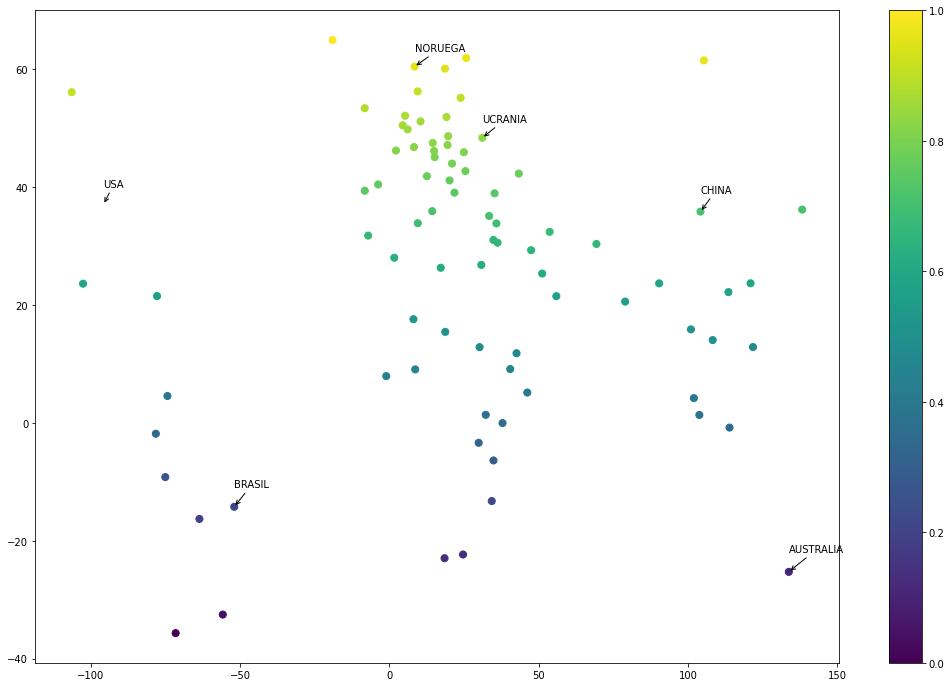

In [310]:
# Graficamos 

plt.scatter(zip_long, zip_lat, s = zip_count, c= zip_count)
plt.colorbar()
plt.scatter(all_data.longitude, all_data.latitude, s=50, c=all_data.latitude)

ard = dict(arrowstyle="->")
plt.annotate('USA', xy = (-95.712891, 37.09024), 
               xytext = (-95.712891, 40), arrowprops = ard)
plt.annotate('UCRANIA', xy = (31.16558,48.379433), 
               xytext = (31.16558,51), arrowprops= ard)
plt.annotate('BRASIL', xy = (-51.92528, -14.235004), 
               xytext = (-51.92528, -11), arrowprops= ard)
plt.annotate('CHINA', xy = (104.195397, 35.86166), 
               xytext = (104.195397, 39), arrowprops= ard)
plt.annotate('AUSTRALIA', xy = (133.775136, -25.274398), 
               xytext = (133.775136, -22), arrowprops= ard)
plt.annotate('NORUEGA', xy = (8.468946, 60.472024), 
               xytext = (8.468946, 63), arrowprops= ard)

params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) )

# Se grafico los paises de interes:USA UK BRASIL CHINA AUSTRALIA NORWAY